# User Engagement Analysis 

## Introduction

According to mixpanel.com, **user engagement** measures whether users find value in a product/service. This can be measured by a variety/combination of activities. Highly engaged users are generally more profitable, *provided their activities are tied to valuable outcomes*. 

User engagement is dependent on the company's business model. In Showwcase's case, key metrics for user engagement include positive actions such as *projects_added*, *likes_given*, *comments_given*, *session_projects_added*, *session_likes_given*, *session_comments_given*. Other metrics that help deepen the company's understanding of user engagement include actions that suggest lesser engagement. These include *bugs_occurred*, *bugs_in_session*, and the relationship between *inactive_duration* and *session_duration*. The following analyses will focus on these metrics. 

My analyses also seeks to answer the following questions related to user engagement: 

1. Projects are a unique feature that allow users to "showcase" their skills to the greater tech community. They also do well to increase a profile's visibility. **That being said, what proportion of users add at least one project to their profiles? Among those who add projects, how many do they add on average?**

2. It is useful to show activity trends over the course of the month. **Did the number of logins increase or decrease throughout October 2019?**

3. How many times a user logs onto Showwcase is a key metric for user engagement. We want to be seeing users logging on multiple times. **Thus, what proportion of users logged on more than once over the course of the week?** 

4. The user experience is fundamental to maintaining user engagement. Smooth user experiences allow Showwcase to increase customer loyalty. **That being said, how many sessions experienced bugs, and in what proportion of sessions did bigs occur?**

5. Do any two variables affect one another? **Are any two metrics correlated with one another?**

These analyses will also use Python data analysis libraries, which are installed below.

In [2]:
# import libraries 

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

We begin the analyses by exploring various properties of the data and cleaning the data as deemed fit. 

In [8]:
# load the data into a pandas dataframe
sessions_df = pd.read_excel("showwcase_sessions.xls")

# ensure the dataframe has loaded properly
sessions_df.head(10)

,session_id,customer_id,login_date,projects_added,likes_given,comment_given,inactive_status,bug_occured,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,2019-10-30,False,True,True,True,False,0,24.0,3,1146,0,1564
1,624241,24520,2019-10-30,True,True,True,True,False,2,3.0,5,133,0,1766
2,111002,32047,2019-10-30,True,True,True,True,False,1,5.0,5,1571,0,2230
3,545113,23404,2019-10-30,True,True,True,False,False,1,10.0,21,0,0,633
4,750269,40235,2019-10-30,True,True,False,True,False,3,16.0,0,1405,0,1679
5,744943,73245,2019-10-30,True,True,True,True,True,3,27.0,5,1746,4,1490
6,922001,12407,2019-10-30,True,False,True,False,False,5,0.0,5,0,0,1329
7,823895,29375,2019-10-30,False,False,True,True,False,0,0.0,5,2474,0,1875
8,490096,40572,2019-10-30,True,True,False,False,False,1,25.0,0,0,0,290
9,919319,23404,2019-10-29,True,True,False,True,False,2,14.0,0,2031,0,1957


In [23]:
# dimensions
print(sessions_df.shape)

# columns' datatypes
print(sessions_df.dtypes)

(300, 14)
session_id                         int64
customer_id                        int64
login_date                datetime64[ns]
projects_added                      bool
likes_given                         bool
comment_given                       bool
inactive_status                     bool
bug_occured                         bool
session_projects_added             int64
session_likes_given              float64
session_comments_given             int64
inactive_duration                  int64
bugs_in_session                    int64
session_duration                   int64
dtype: object


In [32]:
# statistical properties of numeric variables
sessions_df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,300.000000,300.000000,300.000000,299.000000,300.000000,300.000000,300.000000,300.000000
mean,530643.296667,44956.766667,1.620000,10.458194,2.406667,732.933333,1.233333,1186.763333
std,280421.371240,26411.336491,1.334743,9.474839,2.247545,838.143032,1.757608,688.632138
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,308358.000000,23571.250000,1.000000,0.000000,0.750000,0.000000,0.000000,611.250000
50%,553675.000000,38967.000000,2.000000,9.000000,2.000000,313.500000,0.000000,1152.000000
75%,804120.250000,73245.000000,3.000000,19.000000,4.000000,1524.750000,2.250000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


There appears to be an outlier in the dataset. In one of the sessions, the inactive duration is greater than the session duration. Based on my understanding, the inactive duration is supposed to be less than or equal to the session_duration. Thus, the outlier will be removed and the dataframe will be checked for missing data. 

All redundant columns, essentially the boolean columns for likes, comments, projects, bugs, and inactive status,  will also be dropped because they can be explained by their numeric representations. 

In [40]:
# dropping redundant columns
df_cleaned = sessions_df.drop(['projects_added', 'likes_given',
                             'comment_given', 'bug_occured', 'inactive_status'], axis = 1)
df_cleaned

,session_id,customer_id,login_date,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,2019-10-30,0,24.0,3,1146,0,1564
1,624241,24520,2019-10-30,2,3.0,5,133,0,1766
2,111002,32047,2019-10-30,1,5.0,5,1571,0,2230
3,545113,23404,2019-10-30,1,10.0,21,0,0,633
4,750269,40235,2019-10-30,3,16.0,0,1405,0,1679
...,...,...,...,...,...,...,...,...,...
295,944212,40572,2019-10-01,3,13.0,0,1174,0,2255
296,558332,87323,2019-10-01,2,0.0,0,97,0,1692
297,643880,51243,2019-10-01,2,0.0,0,906,0,1990
298,844518,23083,2019-10-01,1,0.0,0,139,0,1113


In [49]:
# checking for missing values in the data
df_cleaned.isna()

# although it appears there are no missing data, drop rows which contain missing data
df_cleaned = df_cleaned.dropna(axis = 0, how = 'any')
df_cleaned

,session_id,customer_id,login_date,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
0,624205,80746,2019-10-30,0,24.0,3,1146,0,1564
1,624241,24520,2019-10-30,2,3.0,5,133,0,1766
2,111002,32047,2019-10-30,1,5.0,5,1571,0,2230
3,545113,23404,2019-10-30,1,10.0,21,0,0,633
4,750269,40235,2019-10-30,3,16.0,0,1405,0,1679
...,...,...,...,...,...,...,...,...,...
295,944212,40572,2019-10-01,3,13.0,0,1174,0,2255
296,558332,87323,2019-10-01,2,0.0,0,97,0,1692
297,643880,51243,2019-10-01,2,0.0,0,906,0,1990
298,844518,23083,2019-10-01,1,0.0,0,139,0,1113


One row contained missing data because we now have a 299 x 9 dataframe. This updated dataframe is stored in df_cleaned. 

In [50]:
# how many unique values does each variable contain?
df_cleaned.nunique(axis = 0)

session_id                299
customer_id                48
login_date                 30
session_projects_added      8
session_likes_given        28
session_comments_given      9
inactive_duration         169
bugs_in_session             6
session_duration          278
dtype: int64

Notable insight: 48 unique customers logged onto Showwcase in October 2019. 

In [51]:
df_cleaned.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,session_id,customer_id,session_projects_added,session_likes_given,session_comments_given,inactive_duration,bugs_in_session,session_duration
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,529534.652174,45028.849498,1.618729,10.458194,2.408027,731.638796,1.237458,1190.414716
std,280232.153769,26426.038013,1.336799,9.474839,2.251190,839.247660,1.759100,686.871418
min,22885.000000,10246.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000
25%,307856.000000,23579.000000,1.000000,0.000000,0.500000,0.000000,0.000000,614.000000
50%,552796.000000,39475.000000,2.000000,9.000000,2.000000,312.000000,0.000000,1152.000000
75%,802738.000000,73245.000000,3.000000,19.000000,4.000000,1525.500000,2.500000,1778.000000
max,999480.000000,98653.000000,9.000000,27.000000,21.000000,2480.000000,5.000000,2395.000000


## Question 1
What proportion of users add at least one project to their profiles? Among those that have, how many do they add on average?

In [108]:
# creating a dataframe where 0 projects were added
no_projects_added = df_cleaned.query('session_projects_added == 0')

# counting the number of sessions where 0 projects were added 
# 73
no_projects_added['session_id'].agg('count')

# average number of projects added per session 
# 2.14 projects/session
df_cleaned.query('session_projects_added > 0')['session_projects_added'].agg('mean')

2.1415929203539825

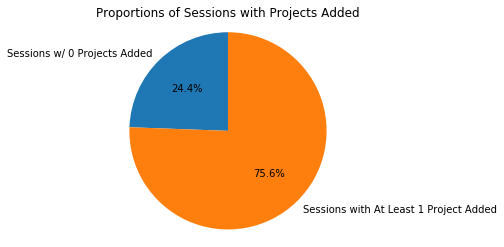

In [94]:
# pie chart showing proportion of sessions where projects were added vs 0 projects

size = [100*73/299, 100*226/299]
labels = 'Sessions w/ 0 Projects Added', 'Sessions with At Least 1 Project Added'

fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels, autopct='%1.1f%%', startangle = 90)
ax1.axis('equal') # ensures pie is drawn as a circle 
plt.title("Proportions of Sessions with Projects Added")
plt.show()

In 75.6% of sessions, users are adding at least 1 project to their profiles. This indicates that users are making use of the features relating to projects on Showwcase. Of all users who added a project, on average 2.14 projects were added per user.

## Question 2
We want to observe trends in user activity over the course of the month. Did the number of logins per day increase, decrease, or remain the same during October 2019?

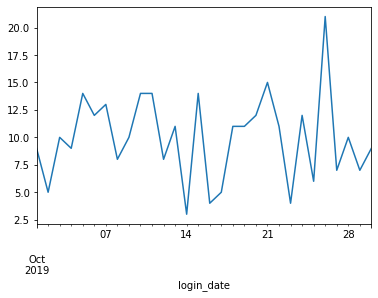

In [85]:
# line plot showing the number of logins per day for October 2019

# displays how many lgogins occurred each day 
sessions_per_day = df_cleaned.groupby(df_cleaned.login_date).count()

# this line contains the login_dates and the number of logins per day
sessions_per_day['session_id']

sessions_per_day['session_id'].plot.line(x = 'login_date', y = 'login count')

Based on this simple pandas line plot, the number of logins fluctuates between days. However, the overall trend appears constant throughout October 2019. 

## Question 3
How many users logged onto Showwcase more than once in October 2019? 

In [93]:
# group the dataframe by customer_id
logins_per_customer = df_cleaned.groupby(df_cleaned['customer_id']).count()
logins_per_customer

# the column we use after ...query(login_date > 1) doesn't matter because they all contain 
# the same value, which is 30
# I am only doing this to extract a single value
multiple_login_users = logins_per_customer.query('login_date > 1')['session_id'].count()
unique_users = df_cleaned['customer_id'].nunique()
single_login_users = unique_users - multiple_login_users
single_login_users

18

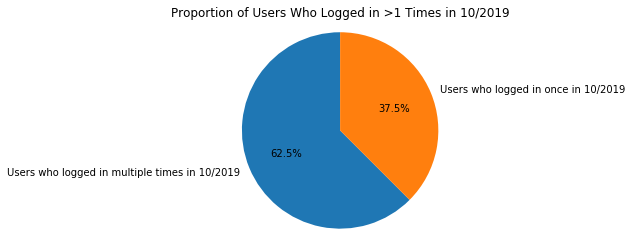

In [99]:
# pie chart showing proportion of multiple login users vs those who logged in once
size = [100*multiple_login_users/unique_users, 100*single_login_users/unique_users]
labels = 'Users who logged in multiple times in 10/2019', 'Users who logged in once in 10/2019'

fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels, autopct='%1.1f%%', startangle = 90)
ax1.axis('equal') # ensures pie is drawn as a circle 
plt.title("Proportion of Users Who Logged in >1 Times in 10/2019")
plt.show()

Of the 48 unique users who logged onto Showwcase in October 2019, 5/8 of them logged in multiple times. This implies that the majority of users are repeat users of the product. 

## Question 4
How many sessions experienced bugs, and what proportion? 

In [101]:
# number of sessions (299)
sessions = df_cleaned['session_id'].count()

# number of buggy sessions (116)
buggy_sessions = df_cleaned.query('bugs_in_session > 0').count()
bug_sesh = buggy_sessions['bugs_in_session']

not_buggy = sessions - bug_sesh
not_buggy

183

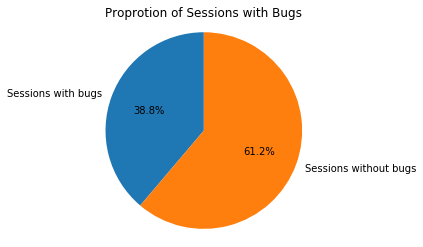

In [102]:
# pie chart for proportion of buggy sessions
size = [100*bug_sesh/sessions, 100*not_buggy/sessions]
labels = 'Sessions with bugs', 'Sessions without bugs'

fig1, ax1 = plt.subplots()
ax1.pie(size, labels=labels, autopct='%1.1f%%', startangle = 90)
ax1.axis('equal') # ensures pie is drawn as a circle 
plt.title("Proprotion of Sessions with Bugs")
plt.show()

The data shows that 38.8% of sessions in October 2019 experienced at least one bug, a relatively high figure. While it hasn't been shown that bugs directly affect user engagement in a negative manner, bugs affect the user's experience on Showwcase, which can be a determining factor for user engagement. 

## Question 5
Are any two metrics for user engagement positively/negatively correlated with one another?

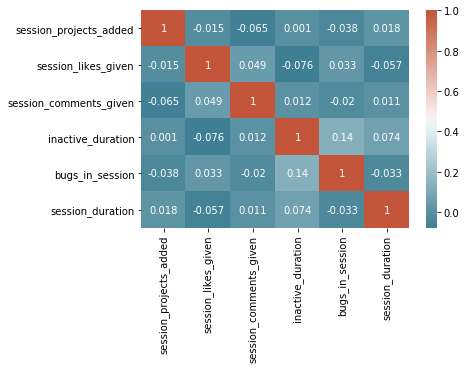

In [106]:
# correlation matrix
# drop session_id, customer_id columns because they're not relevant here
corr_df = df_cleaned.drop(['session_id', 'customer_id'], axis = 1)
corr = corr_df.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns,
annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Correlation values range from -1 to 1, where -1 means two variables are strongly negatively correlated and 1 means they are strongly positively correlated. Based on my intuition of the variables, it could have been possible that variables such as *inactive_duration* and *session_duration* could have been correlated in some way. The same goes for *bugs_in_session* and *inactive_duration* and *session_projects_added* and *session_duration*. Ultimately, no two variables are strongly correlated with one another, with the highest correlation value being 0.14 between *inactive_duration* and *bugs_in_session*.

## Future Considerations
User engagement is loosely defined, and there were few definitive ways to gain a better understanding of it. These metrics are useful for understanding the way users interact with the platform. In the future, I think it would be useful to devise a way to score a user's engagement with the platform. For example, considering all metrics, we could assign a user an engagement score from 0-5, where 0 is not engaged and 5 is actively engaged. This overall user engagement score, as well as the engagement metrics already at our disposal, can provide the Product team greater insight when making important product/marketing decisions. 

I also tried to access customer and session id's as little as possible because these identifiers are personal to the user. I tried my best to maintain integrity and data privacy. 